### Линейная регрессия

In [2]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Пусть у нас есть набор значений `y` зависящий от параметра `x`

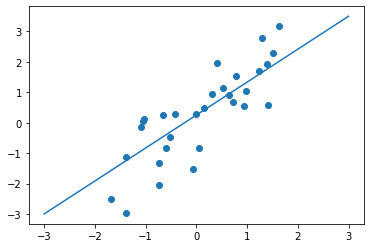

In [75]:
rand = np.random.RandomState(42)
data = rand.multivariate_normal([0, 0], [[1, 2], [2,3]], 30)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Paired);
plt.plot([-3, 3], [-3, 3.5]); # Возможный вариант решения задачи

И мы хотим построить линейную функцию $y_{i}=kx_{i} + b $ так, чтобы **сумма квадратов отклоненй** была **наименьшая**

$ S(k, b) = \sum_{i=1}^n(y_{i} - kx_{i} - b)^2 \rightarrow min $, 

$y_{i}\$ - фактическое значение, 

$kx_{i} - b$ - предсказанное

т.е задача сводится к нахождению коэфициентов `k` и `b`

`k` - угловой коэфициент

`b` - смещение

Найдем частные производные по `k` и `b`:

$S_{k}^\prime = -2x_{i}\sum_{i=1}^n(y_{i} - kx_{i} - b)$

$S_{b}^\prime = -x_{i}\sum_{i=1}^n(y_{i} - kx_{i} - b)$

Получаем систему алгебраических уравнений:

$
\begin{cases}
-2x_{i}\sum_{i=1}^n(y_{i} - kx_{i} - b) = 0 \\
-x_{i}\sum_{i=1}^n(y_{i} - kx_{i} - b) = 0
\end{cases}
$

Делим на 2 и раскрываем сумму:

$
\begin{cases}
- \sum x_{i}y_{i} + k\sum x_{i}^2 + b\sum x_{i} = 0  \\
- \sum y_{i} + k\sum x_{i} + bn = 0
\end{cases}
$

Перенесем известные в правую часть:

$
\begin{cases}
 k\sum x_{i}^2 + b\sum x_{i} = \sum x_{i}y_{i} \\
 k\sum x_{i} + bn = \sum y_{i}
\end{cases}
$

Поделим оба уравнение на `n` - количество элементов в выборке:

$
\begin{cases}
 k\frac{\sum x_{i}^2}{n} + b\frac{\sum x_{i}}{n} = \frac{\sum x_{i}y_{i}}{n} \\
 k\frac{\sum x_{i}}{n} + b = \frac{\sum y_{i}}{n}
\end{cases}
$

В результате получим слагаемые в виде **среднего квадрата x**, **среднего x**, **среднего произведения xy** и т.д:

$
\begin{cases}
 k\overline{x^2} + b\overline{x} = \overline{xy} \\
 k\overline{x} + b = \overline{y}
\end{cases}
$

Выразим `b`:
    
$ b = \overline{y} - k\overline{x}$

Подставим в первое уравнение:

$ k\overline{x^2} + \overline{x}(\overline{y} - k\overline{x}) = \overline{xy} $

Раскроем скобки:

$ k\overline{x^2} + \overline{x}\overline{y} - k(\overline{x})^2 = \overline{xy} $

Выражем из этого `k`:

$ k = \frac{\overline{xy} - \overline{x} * \overline{y}}{\overline{x^2} - (\overline{x})^2} $



Значение в знаменателе это Дисперсия (средний квадрат отклонения от среднего значения $ D_{x} = \frac{\sum_{i=1}^n(x_{i} - \overline{x})^2}{n} $):

$ D_{x} = \overline{x^2} - (\overline{x})^2 $

Значение в числителе это Ковариация ($ COV_{xy} = \frac{\sum_{i=1}^n[(x_{i} - \overline{x})(y_{i} - \overline{y})]}{n} $):

$ COV_{xy} = \overline{xy} - \overline{x} * \overline{y} $

Получается что `k` это:

$ k = \frac{COV_{xy}}{D_{x}} $

#### Пример

Возьмем данные зависимости роста от веса 10 человек

In [78]:
h = np.array([1.67, 1.72, 1.58, 1.83, 1.91, 1.72, 1.68, 1.74, 1.68, 1.87]) # метры
weight = np.array([58, 61, 55, 68, 77, 60, 57, 59, 60, 75]) # килограммы

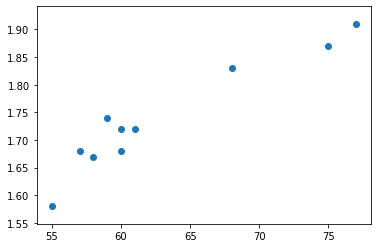

In [79]:
plt.scatter(weight, h, cmap=plt.cm.Paired);

In [84]:
h_avg = np.round(h.mean(), 2)
w_avg = weight.mean()
print("Средний рост: %s, Средний вес: %s" % (h_avg, w_avg))

Средний рост: 1.74, Средний вес: 63.0


In [95]:
Dx = np.round(np.var(h), 5)
std_x = np.round(np.std(h), 4)
print("Дисперсия x: %s, Среднеквадратичное отклонение x: %s" % (Dx, std_x))

Dy = np.round(np.var(weight), 5)
std_y = np.round(np.std(weight), 4)
print("Дисперсия y: %s, Среднеквадратичное отклонение y: %s" % (Dy, std_y))

Дисперсия x: 0.00924, Среднеквадратичное отклонение x: 0.0961
Дисперсия y: 52.8, Среднеквадратичное отклонение y: 7.2664


In [103]:
cov = np.cov(h, weight)[0][1]
print("Ковариация: %s" % cov)

Ковариация: 0.7400000000000001


Найдем теперь `k`

$ k = \frac{COV_{xy}}{D_{x}} $

In [106]:
k = cov / Dx
print(k)

80.0865800865801


Найдем `b`
    
$ b = \overline{y} - k\overline{x}$

In [131]:
b = w_avg - (k * h_avg)
print(b)

-76.35064935064938


Получается следующая линейная зависимость:

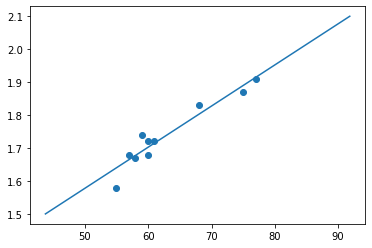

In [130]:
plt.scatter(weight, h, cmap=plt.cm.Paired);
t_h = np.arange(1.5, 2.1, .1)
t_w = k * t_h + b
plt.plot(t_w, t_h);

Найдем значене ошибок для нашей выборки

In [133]:
e = weight - (k * h + b)
print(e)

[ 0.60606061 -0.3982684   4.81385281 -2.20779221  0.38528139 -1.3982684
 -1.19480519 -4.          1.80519481  1.58874459]


Вычислим Дисперсию отклонения

$ D_{отк} = \frac{\sum_{i=1}^n e^2}{n - d} $, где d - количество параметров по которым мы описываем нашу плоскость

In [134]:
e_ = e ** 2
de = e_.sum()/len(e_) - 2
print(de)

3.3887445887445935


#### Коэфициент линейной кореляции

$ L = \frac{COV_{xy}}{\sqrt{D_{x}D_{y}}} $

Если его значение около 0, то значит что зависимости между x и y практически нет

In [138]:
L = cov / np.sqrt(Dx * Dy)
print(L)

1.0594458713137431
